# EDA

In [35]:
import pandas as pd
import numpy as np

In [36]:
heart = pd.read_csv("/content/drive/MyDrive/30619 장우준 인공지능/dataset/heart.csv")
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [37]:
# 기본 정보 출력
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [38]:
# 최대, 최소, 평균, 표준편자, 중앙값 등 출력
heart.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [39]:
# 클래스(타겟)별 수 출력: 0 = 심장마비 가능성 낮음, 1 = 높음
heart["output"].value_counts()

output
1    165
0    138
Name: count, dtype: int64

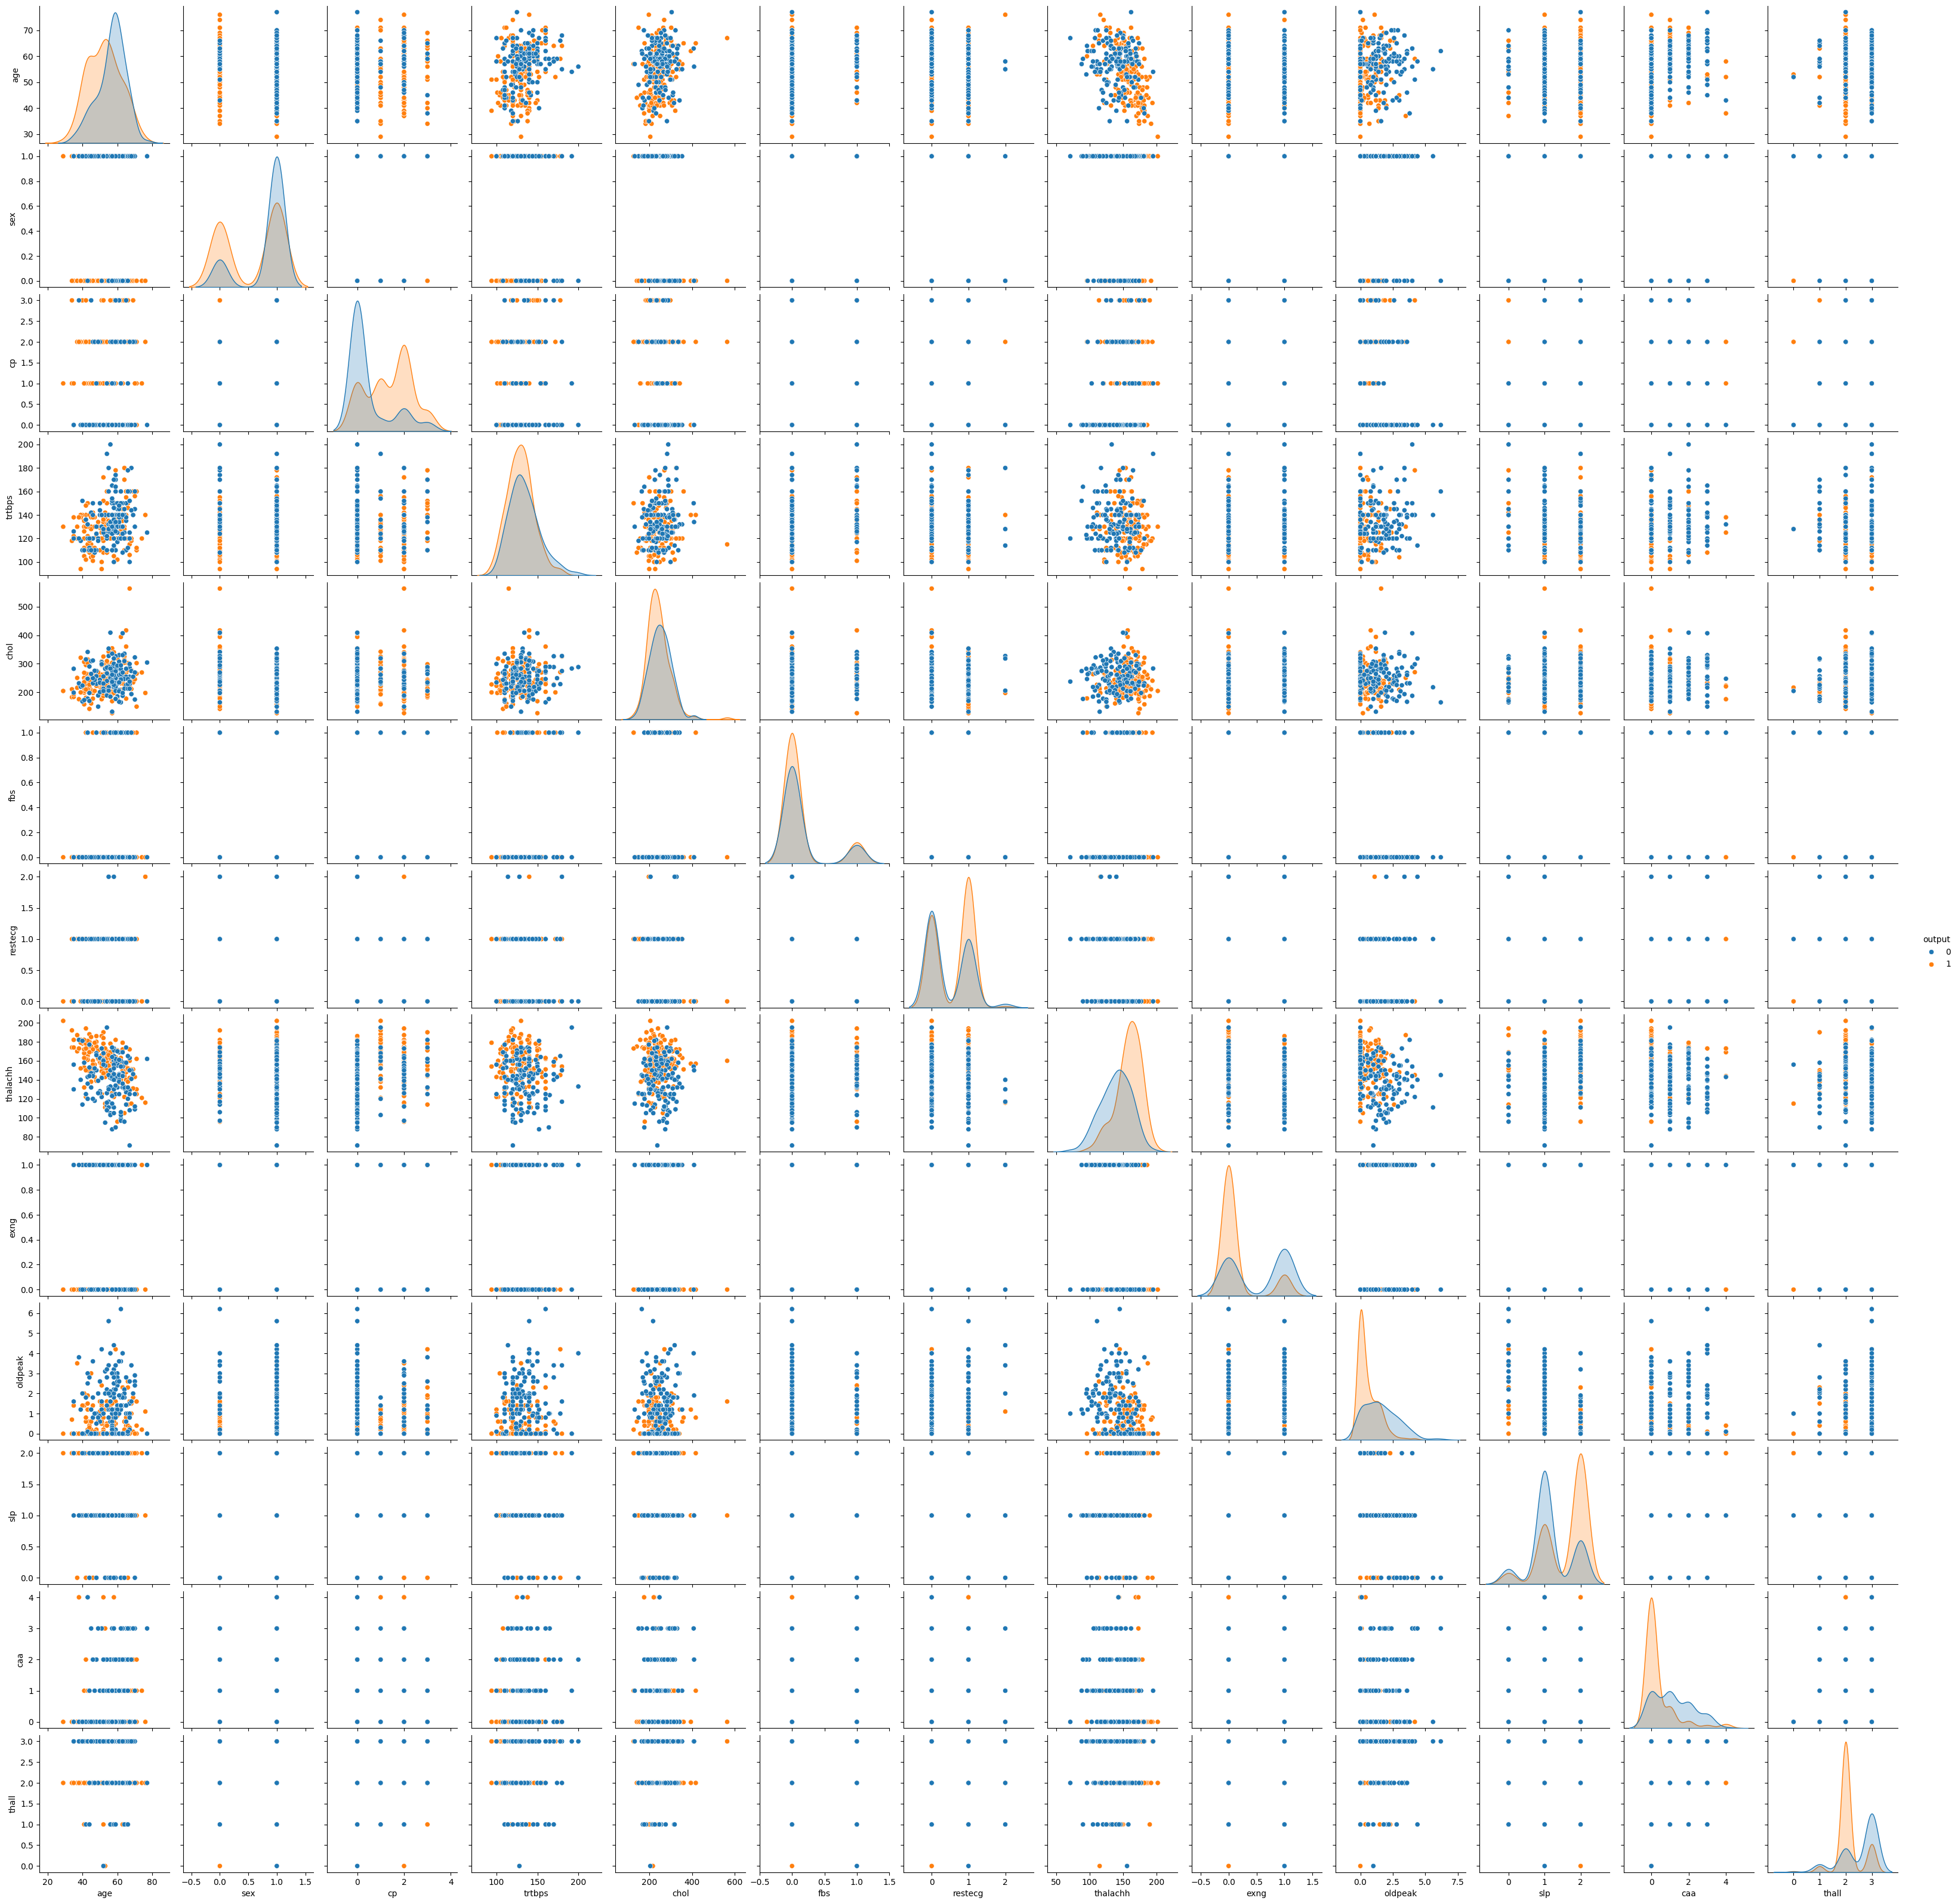

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# 클래스별 pairplot 그리기
sns.pairplot(heart, hue="output")

<Axes: >

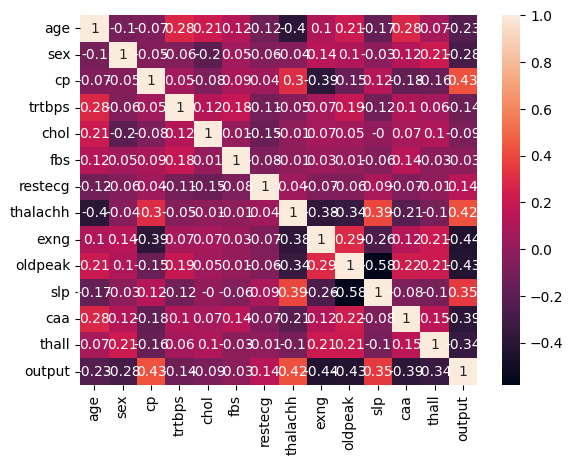

In [41]:
# 상관관계 분석
sns.heatmap(heart.corr().round(2), annot=True)

In [42]:
# 독립변수 / 종속변수 구분 - 종속변수는 output
X = heart.drop("output", axis=1)
y = heart["output"]

In [43]:
# 훈련 데이터, 테스트 데이터 나누기 - 각 클래스(타겟)값이 비슷한 비율로 분류되도록 하기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [44]:
# 정규화 스케일링
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(X_train)

X_train_scaled = mms.transform(X_train)
X_test_scaled = mms.transform(X_test)

In [45]:
# 표준화 스케일링
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train)

X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

# 머신러닝

## 1. knn

In [46]:
# knn 모델 생성, 학습, train score/test score
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [47]:
print(f"knn train {knn.score(X_train_scaled, y_train)}")
print(f"knn test {knn.score(X_test_scaled, y_test)}")

knn train 0.8584905660377359
knn test 0.8131868131868132


In [48]:
# 이웃의 수(n_neighbors)를 3으로 지정해서 다시 학습, score 계산
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

print(f"knn train {knn.score(X_train_scaled, y_train)}")
print(f"knn test {knn.score(X_test_scaled, y_test)}")

knn train 0.8867924528301887
knn test 0.8131868131868132


In [49]:
# 그리드 서치(StratifiedKFold 사용)후 최적의 하이퍼파라미터 출력
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

params = {
    "n_neighbors": range(3, 33)
}
gs = GridSearchCV(KNeighborsClassifier(), params, cv = StratifiedKFold())

gs.fit(X_train_scaled, y_train)
print(f"best k params = {gs.best_params_}")

best k params = {'n_neighbors': 8}


In [50]:
# 최고의 교차검증 점수 출력
gs.best_score_

0.8490586932447396

In [51]:
# 최적의 모델로 정확도 다시 계산knn = KNeighborsClassifier(n_neighbors=3)
knn = gs.best_estimator_

print(f"knn train {knn.score(X_train_scaled, y_train)}")
print(f"knn test {knn.score(X_test_scaled, y_test)}")

knn train 0.8632075471698113
knn test 0.8131868131868132


## 2. lr

In [52]:
# lr 모델 생성, 학습, train score/test score
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)

LogisticRegression()

In [53]:
print(f"lr train {lr.score(X_train_scaled, y_train)}")
print(f"lr test {lr.score(X_test_scaled, y_test)}")

lr train 0.8490566037735849
lr test 0.8351648351648352


In [54]:
# 이웃의 수(C)를 0.1으로 지정해서 다시 학습, score 계산
lr = LogisticRegression(C = 0.1)
lr.fit(X_train_scaled, y_train)

print(f"lr train {lr.score(X_train_scaled, y_train)}")
print(f"lr test {lr.score(X_test_scaled, y_test)}")

lr train 0.8490566037735849
lr test 0.8571428571428571


In [63]:
# 그리드 서치(StratifiedKFold 사용)후 최적의 하이퍼파라미터 출력

params = {
    "C": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
}
gs = GridSearchCV(LogisticRegression(), params, cv = StratifiedKFold())

gs.fit(X_train_scaled, y_train)
print(f"best C params = {gs.best_params_}")

best k params = {'C': 1}


In [56]:
# 최고의 교차검증 점수 출력
gs.best_score_

0.8348837209302324

In [57]:
# 최적의 모델로 정확도 다시 계산 lr = LogisticRegression(C = 0.1)
lr = gs.best_estimator_

print(f"lr train {lr.score(X_train_scaled, y_train)}")
print(f"lr test {lr.score(X_test_scaled, y_test)}")

lr train 0.8490566037735849
lr test 0.8351648351648352


In [62]:
# 기울기, 절편 출력

print(lr.classes_)
print(lr.coef_.shape, lr.intercept_.shape)

print(lr.coef_, lr.intercept_)

[0 1]
(1, 13) (1,)
[[-0.11581277 -0.64705313  0.85956063 -0.23795908 -0.02288389  0.06378521
   0.28082214  0.32335033 -0.50476006 -0.54389394  0.36882127 -0.6517434
  -0.55670412]] [0.1480905]


## 3. dt

In [64]:
# dt 모델 생성, 학습, train score/test score
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [65]:
print(f"dt train {dt.score(X_train, y_train)}")
print(f"dt test {dt.score(X_test, y_test)}")

dt train 1.0
dt test 0.7472527472527473


In [74]:
# dt 깊이 출력
print(f"dt 깊이 = {dt.get_depth()}")

dt 깊이 = 9


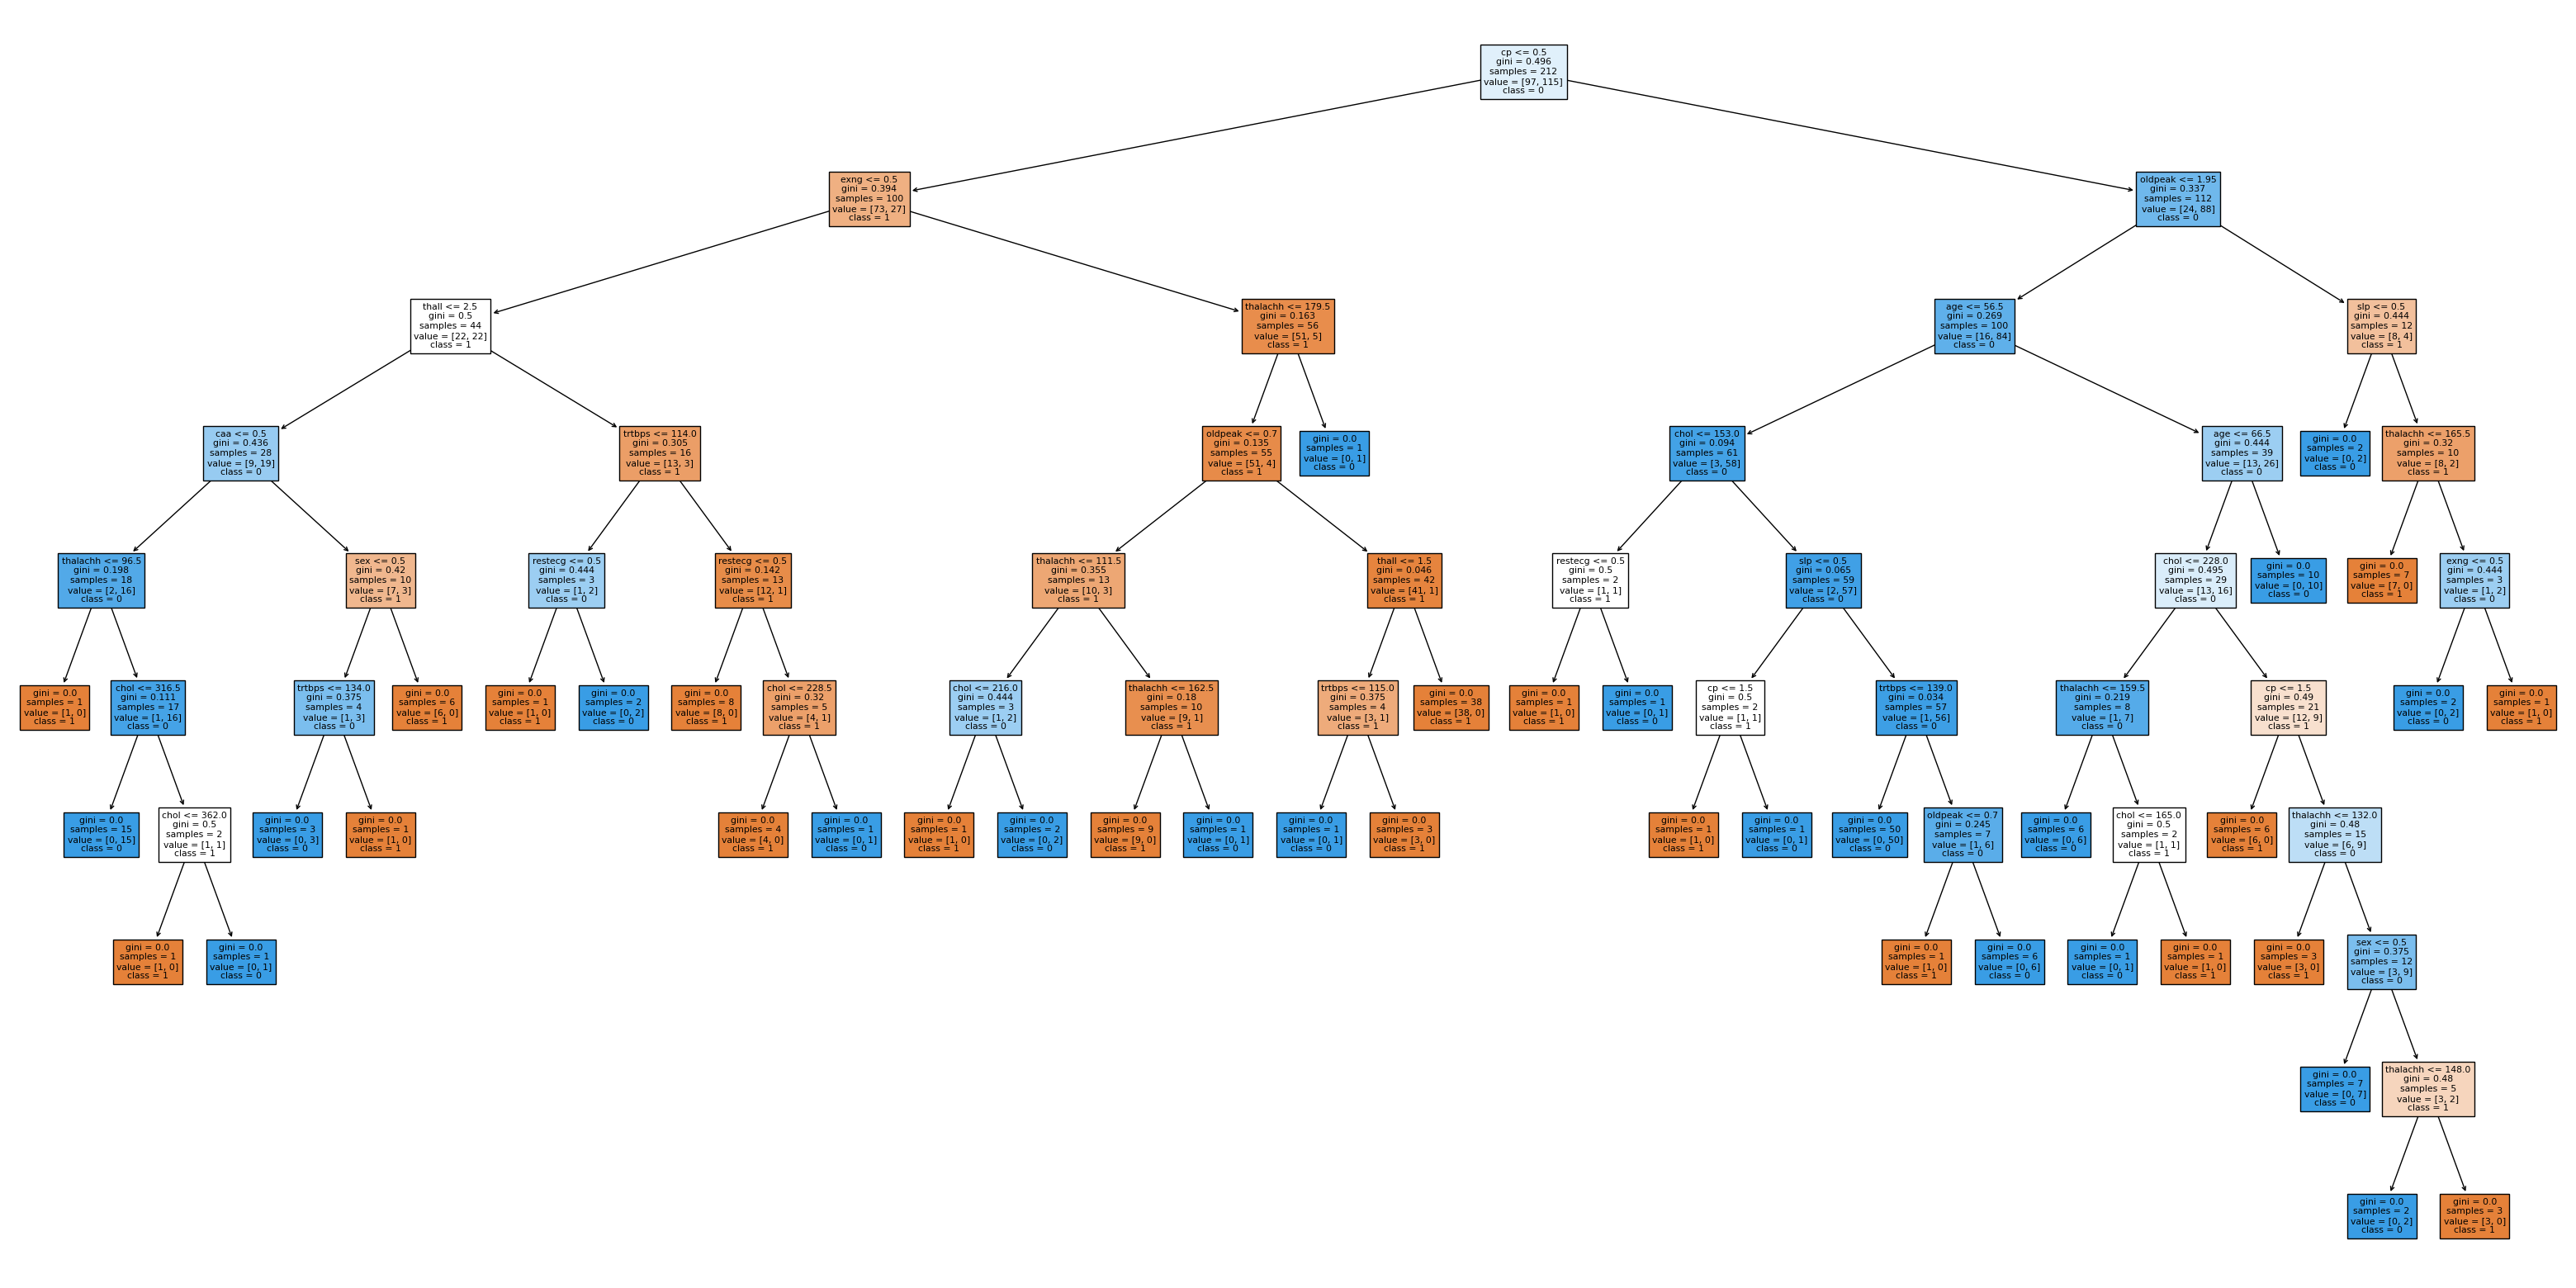

In [71]:
# 트리 시각화
from sklearn.tree import plot_tree

class_names = [str(cls) for cls in pd.unique(y)]

plt.figure(figsize=(40, 20))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=class_names)
plt.show()

In [76]:
# 깊이 3으로 제한 후 다시 학습
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

print(f"dt train = {dt.score(X_train, y_train)}")
print(f"dt test = {dt.score(X_test, y_test)}")

dt train = 0.839622641509434
dt test = 0.8131868131868132


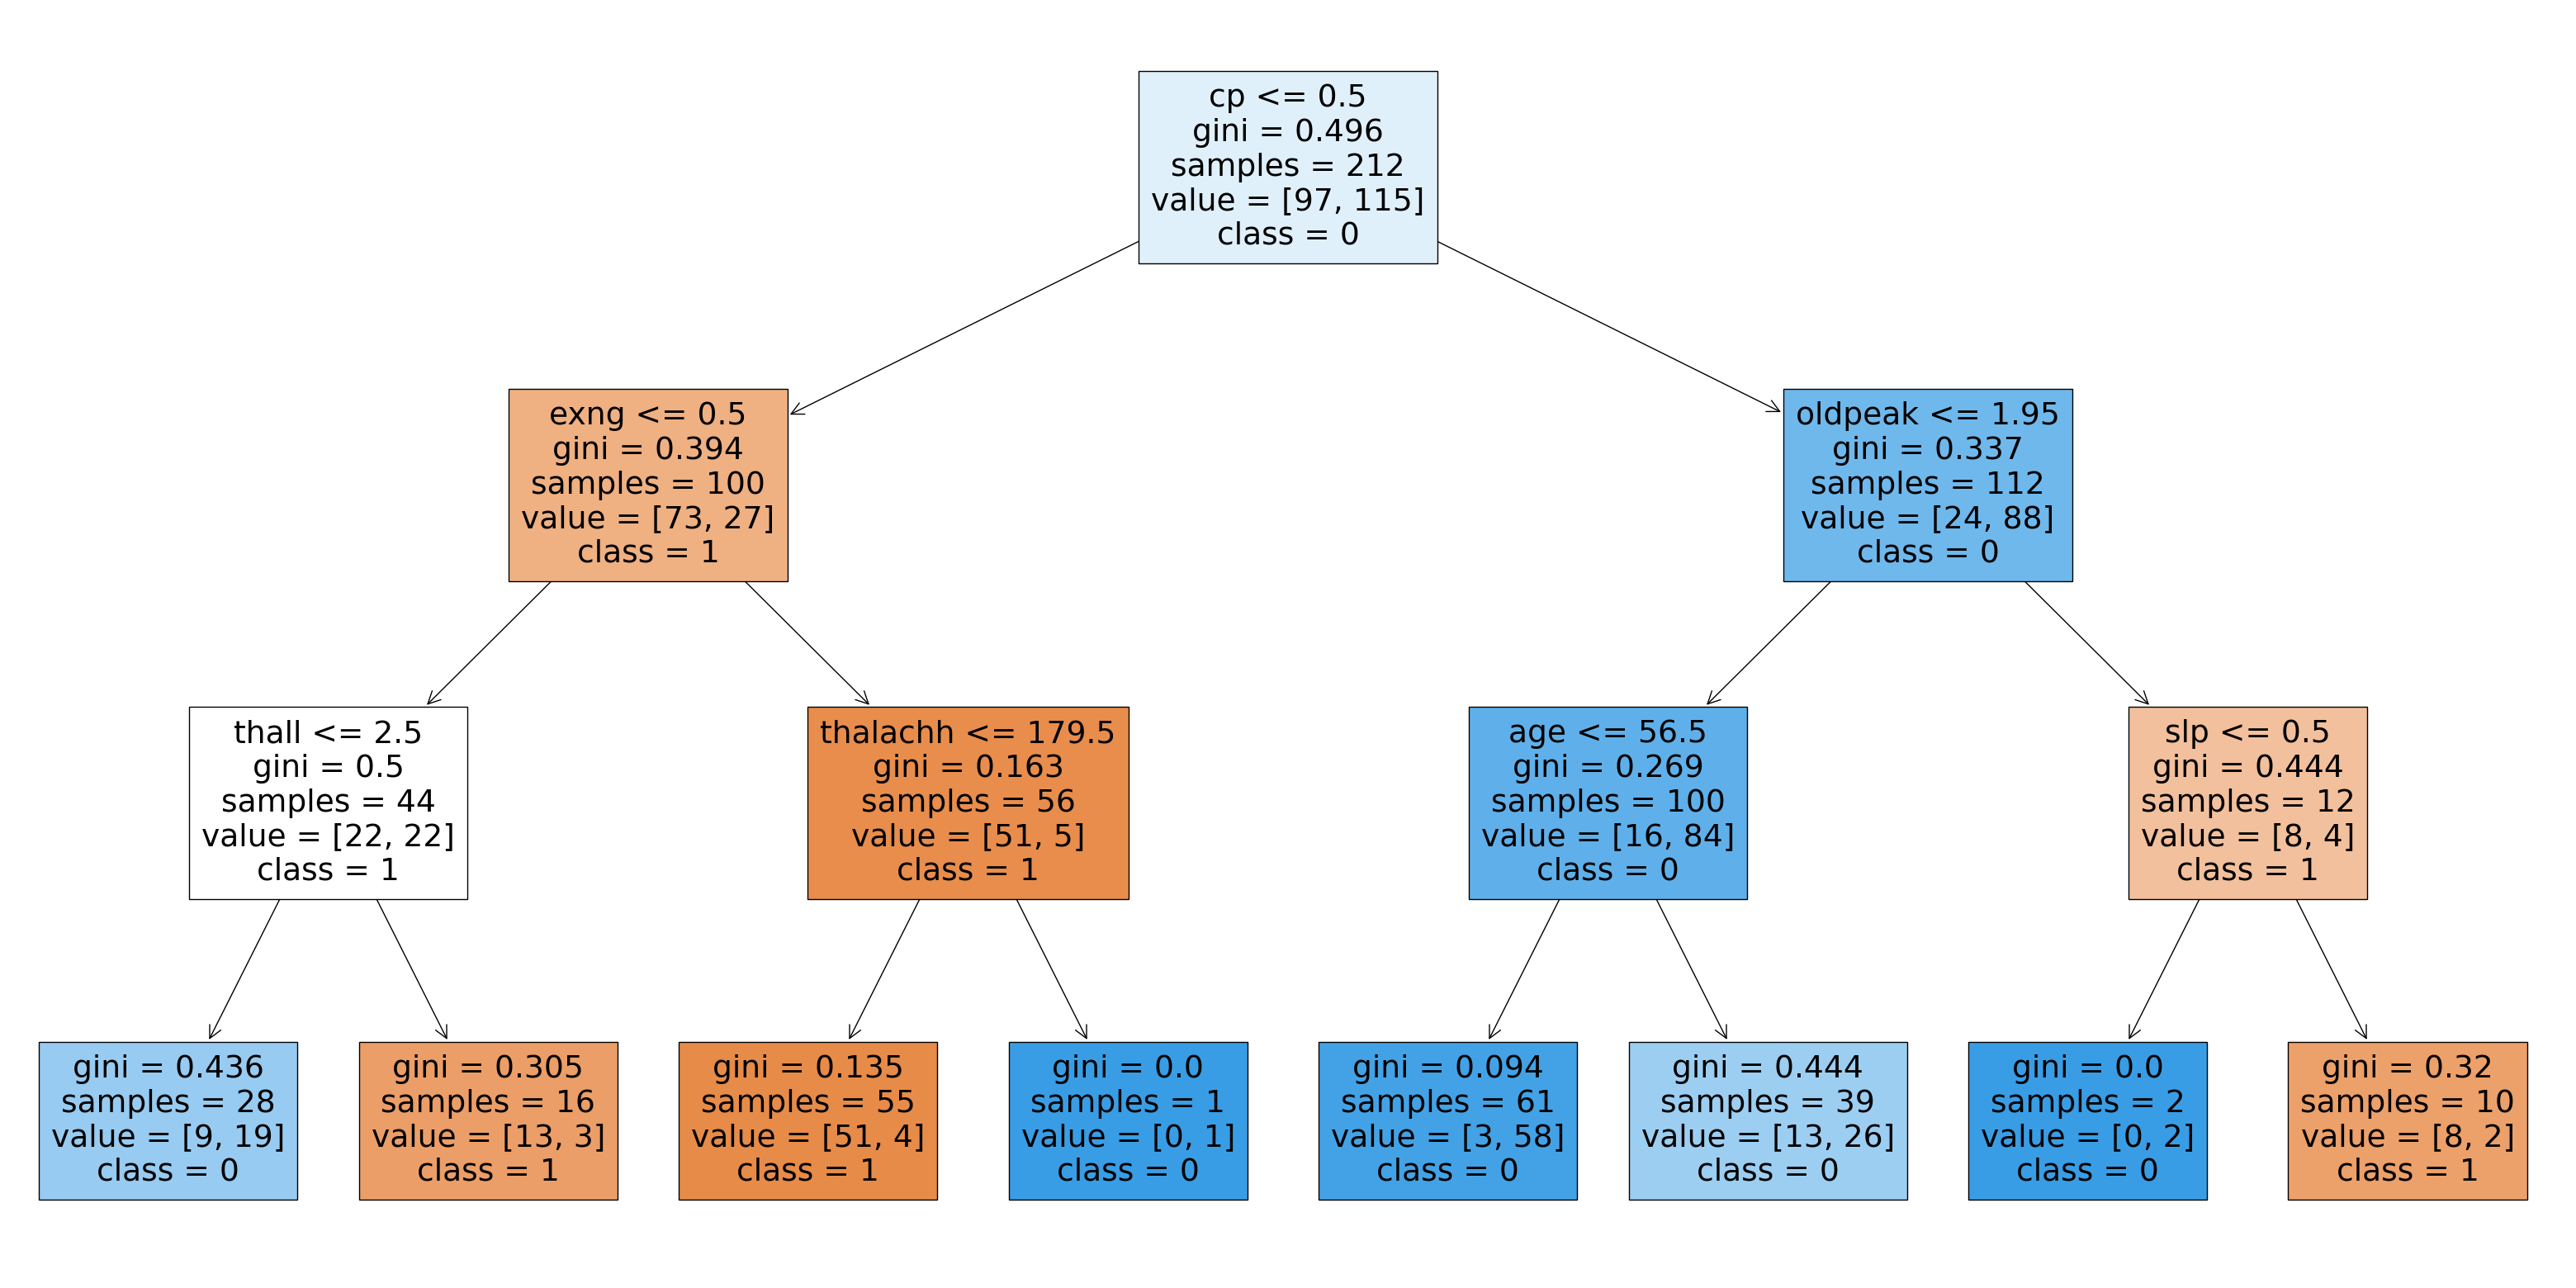

In [77]:
# 깊이 제한 후 시각화
from sklearn.tree import plot_tree

class_names = [str(cls) for cls in pd.unique(y)]

plt.figure(figsize=(40, 20))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=class_names)
plt.show()

In [78]:
# 그리드 서치(StratifiedKFold 사용)후 최적의 하이퍼파라미터 출력

params = {
    'max_depth' : range(1,10,1),
    'min_samples_split' : range(2,30,5),
    'min_samples_leaf' : range(2,30,5)
}

gs = GridSearchCV(DecisionTreeClassifier(), params, cv = StratifiedKFold())

gs.fit(X_train, y_train)
print(f"best params = {gs.best_params_}")

best params = {'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 27}


In [79]:
# 최고의 교차검증 점수 출력
gs.best_score_

0.773421926910299

In [80]:
# 최적의 모델로 정확도 다시 계산
dt = gs.best_estimator_

print(f"dt train = {dt.score(X_train, y_train)}")
print(f"dt test = {dt.score(X_test, y_test)}")

dt train = 0.8584905660377359
dt test = 0.7582417582417582
